In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
np.NaN

nan

In [46]:
adult = pd.read_csv('./adult.csv',header=None)

In [47]:
adult.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [48]:
adult['workclass'].replace(' ?', np.NaN).isna().sum()

adult['workclass'].replace(' ?', np.NaN, inplace=True)

adult['occupation'].replace(' ?', np.NaN).isna().sum()

adult['occupation'].replace(' ?', np.NaN, inplace=True)

adult['native-country'].replace(' ?', np.NaN).isna().sum()

adult['native-country'].replace(' ?', np.NaN, inplace=True)

1836

In [ ]:
'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'income'

In [ ]:
'age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week'

In [58]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [8]:
for i in df.columns:
    print(pd.unique(df[i]))

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 83311 215646 234721 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' P

In [60]:
adult['native-country'] = adult['native-country'].replace('-', ' ', regex=True)

In [65]:
adult.dropna(axis=0, inplace=True)

In [82]:
adult[(adult['age'] >= 18) & (adult['education-num'] >= 9)].shape[0] / adult.shape[0]

0.8756713745772827

In [83]:
adult['income'].value_counts(normalize=True)

 <=50K    0.751078
 >50K     0.248922
Name: income, dtype: float64

In [98]:
mask = adult['sex'] == ' Male'
male_adult = adult[mask]

In [108]:
male_adult['education-num'].value_counts(normalize=True)

9     0.330422
10    0.204661
13    0.172816
14    0.054858
11    0.041806
7     0.033219
12    0.030079
6     0.027969
15    0.022326
4     0.020854
5     0.016487
16    0.014426
8     0.012512
3     0.010746
2     0.005299
1     0.001521
Name: education-num, dtype: float64

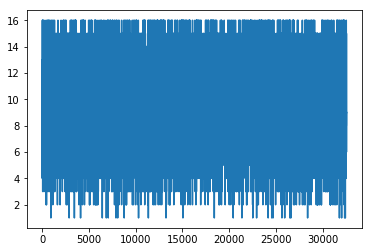

In [119]:
plt.plot(male_adult['education-num'])

In [114]:
adult.plot()
adult.

In [138]:
adult_dummied = pd.get_dummies(adult, columns=['workclass', 'marital-status', 'occupation', 
                                               'relationship', 'race', 'sex', 'income'], drop_first=True,)

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.

In [141]:
ss = StandardScaler()


In [142]:
adult_dummied.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country',
       'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'relationship_ Not-in-family

In [250]:
X = adult_dummied[['age', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week',
       'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Male']]
y=adult['income']

In [251]:
y = np.array(y)

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [253]:
X_trainss = ss.fit_transform(X_train)

X_testss = ss.transform(X_test)

logreg = LogisticRegression()


poly = PolynomialFeatures()

/Users/chuckdye/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/chuckdye/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [257]:
new_poly = poly.fit_transform(X_trainss, y_train)

In [258]:
new_poly_test = poly.transform(X_testss)

In [259]:
logreg.fit(new_poly, y_train)

/Users/chuckdye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [260]:
logreg.score(new_poly, y_train)

0.8611467220724106

In [261]:
logreg.score(new_poly_test, y_test)

0.8509481501127172

In [262]:
trees = RandomForestClassifier(max_depth=10,min_samples_split=4)

In [263]:
trees.fit(new_poly, y_train)

/Users/chuckdye/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [264]:
trees.score(new_poly,y_train)

0.8750718359046903

In [249]:
trees.score(new_poly_test, y_test)

0.8616894311099323

In [268]:
adult['']

TypeError: corr() missing 1 required positional argument: 'other'